In [27]:
# Import
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import seaborn as sns


In [18]:
# Define the parameters used to create the plots
rc = {'figure.figsize':(7,7),
      'axes.facecolor':'white',
      'figure.facecolor':'white',
      'axes.grid' : False,
      'font.size' : 20,    
      'font.sans-serif': 'Arial',
      'font.family': 'sans-serif',
      'svg.fonttype' : 'none'}


# Functions

In [56]:
def get_auc(file):
    with open(file) as f:
        text = f.read()

    # Define a regular expression pattern to match the training set metrics
    pattern = re.compile(r'set metrics:(.*?)Learning rate:', re.DOTALL)

    # Find all matches in the text
    matches = re.findall(pattern, text)

    acceptor_val = []
    donor_val = []
    acceptor_train = []
    donor_train = []

    # Extract and print the training set metrics
    for match in matches:
        all =  match.split(':')
        acceptor_val.append(float(all[6].split('\t')[0].strip()))
        donor_val.append(float(all[17].split('\t')[0].strip()))
        acceptor_train.append(float(all[29].split('\t')[0].strip()))
        donor_train.append(float(all[40].split('\t')[0].strip()))

    return [acceptor_val, donor_val, acceptor_train, donor_train]


def plot_metric(acceptor_val, donor_val, acceptor_train, donor_train, model_num, color, ax=None):

    x = [i for i in range(1, 11)]

    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    validation = [(x + y) / 2 for x, y in zip(acceptor_val, donor_val)]
    training = [(x + y) / 2 for x, y in zip(acceptor_train, donor_train)]

    ax.plot(x, validation, label=str(model_num) + ' (Val)', color=color, marker='o')
    ax.plot(x, training, label= str(model_num) + ' (Train)', color=color, marker='o', linestyle='dashed')

    return ax

def mean_of_lists(*lists):
    # Combine elements at the same positions using zip
    grouped_elements = zip(*lists)
    # Calculate the mean for each group
    means = [sum(group) / len(group) for group in grouped_elements]
    return means

# Plot AUC of retina and GTEx model

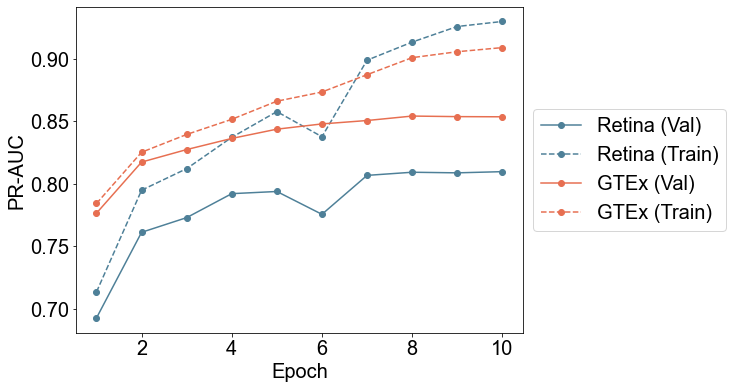

In [57]:
# Define colors for each file
colors = ['#4E8098', '#E76F51']

# import the data
path = '../output_train/'
fig, ax = plt.subplots(figsize=(10, 6))

# get the accuracy for each model
models = ['SpliceAI_standard_retina', 'SpliceAI_standard_gtex']

# get the auc for each model
auc = []
for model in models:
    model1 = get_auc(path + model + str(1) + '.txt')
    model2 = get_auc(path + model + str(2) + '.txt')
    model3 = get_auc(path + model + str(3) + '.txt')
    model4 = get_auc(path + model + str(4) + '.txt')
    model5 = get_auc(path + model + str(5) + '.txt')
    
    out = []

    for i in range(len(model1)):
        out.append(mean_of_lists(model1[i], model2[i], model3[i], model4[i], model5[i]))

    auc.append(out)

plt.rcParams.update(rc)
for i, color, name in zip(auc, colors, ['Retina','GTEx']):
    ax = plot_metric(i[0], i[1], i[2], i[3], name, color, ax=ax)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Epoch')
ax.set_ylabel('PR-AUC')
plt.savefig('Retina_GTEx_AUC.svg')
plt.show()

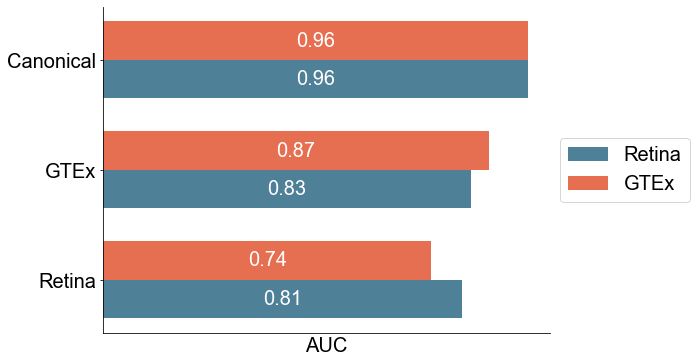

In [58]:
# Barplot PR-AUC test dataset

retina = [0.81, 0.83, 0.96]
gtex = [0.74, 0.87, 0.96]

labels = ['Retina', 'GTEx', 'Canonical']

# Bar width
bar_width = 0.35

# Positions of the bars on the y-axis
y_pos = np.arange(len(labels))

# Creating the horizontal bar plot
plt.rcParams.update(rc)
fig, ax = plt.subplots(figsize=(10, 6))

bars_retina = ax.barh(y_pos, retina, bar_width, label='Retina', color = '#4E8098')
bars_gtex = ax.barh(y_pos + bar_width, gtex, bar_width, label='GTEx', color = '#E76F51')

for bar in bars_retina:
    width = bar.get_width()
    ax.annotate(f'{width:.2f}',
                xy=(width / 2, bar.get_y() + bar.get_height() / 2),
                ha='center', va='center', color = 'white')

for bar in bars_gtex:
    width = bar.get_width()
    ax.annotate(f'{width:.2f}',
                xy=(width / 2, bar.get_y() + bar.get_height() / 2),
                ha='center', va='center', color = 'white')
    
# Adding labels
ax.set_yticks(y_pos + bar_width / 2)
ax.set_yticklabels(labels)
ax.set_xlabel('AUC')
# Removing x-axis numbers
ax.xaxis.set_ticks([])

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Remove black x and y axis line
sns.despine(bottom = False, left = False)
# Show plot
plt.show()


# Optimized

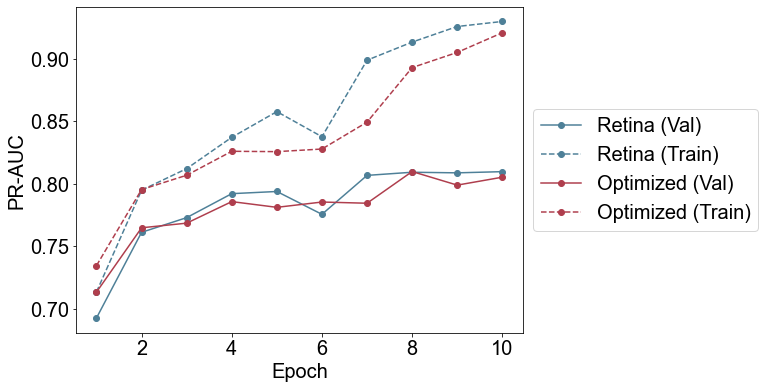

In [59]:
fig, ax = plt.subplots(figsize=(10, 6))

# get the accuracy for each model
models = ['SpliceAI_standard_retina', 'SpliceAI_optimized_retina']

# get the auc for each model
auc = []
for model in models:
    model1 = get_auc(path + model + str(1) + '.txt')
    model2 = get_auc(path + model + str(2) + '.txt')
    model3 = get_auc(path + model + str(3) + '.txt')
    model4 = get_auc(path + model + str(4) + '.txt')
    model5 = get_auc(path + model + str(5) + '.txt')
    
    out = []

    for i in range(len(model1)):
        out.append(mean_of_lists(model1[i], model2[i], model3[i], model4[i], model5[i]))

    auc.append(out)

colors = ['#4E8098', '#AF3E4D']

for i, color, name in zip(auc, colors, ['Retina','Optimized']):
    ax = plot_metric(i[0], i[1], i[2], i[3], name, color, ax=ax)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Epoch')
ax.set_ylabel('PR-AUC')
plt.savefig('Optimized_AUC.svg')
plt.show()

# Dropout

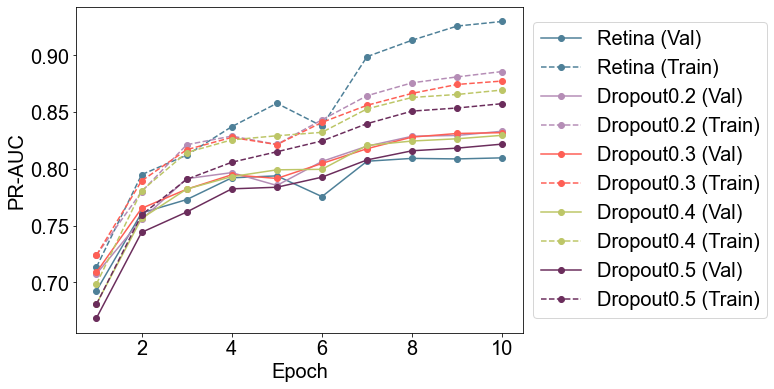

In [60]:
# Define colors for each file
colors = ['#4E8098','#B58DB6', '#FE5F55', '#BDC667', '#6B2D5C']

# import the data
path = '../output_train/'
fig, ax = plt.subplots(figsize=(10, 6))

# get the accuracy for each model
models = ['SpliceAI_standard_retina', 'SpliceAI_dropout0.2_retina', 'SpliceAI_dropout0.3_retina', 'SpliceAI_dropout0.4_retina', 'SpliceAI_dropout0.5_retina']

# get the auc for each model
auc = []
for model in models:
    model1 = get_auc(path + model + str(1) + '.txt')
    model2 = get_auc(path + model + str(2) + '.txt')
    model3 = get_auc(path + model + str(3) + '.txt')
    model4 = get_auc(path + model + str(4) + '.txt')
    model5 = get_auc(path + model + str(5) + '.txt')
    
    out = []

    for i in range(len(model1)):
        out.append(mean_of_lists(model1[i], model2[i], model3[i], model4[i], model5[i]))

    auc.append(out)

for i, color, name in zip(auc, colors, ['Retina','Dropout0.2', 'Dropout0.3', 'Dropout0.4', 'Dropout0.5']):
    ax = plot_metric(i[0], i[1], i[2], i[3], name, color, ax=ax)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Epoch')
ax.set_ylabel('PR-AUC')
plt.savefig('Dropout_AUC.svg')
plt.show()